In [1]:
import pandas as pd

# location_data = pd.read_csv(r'C:\Users\Abraham de Leija\Desktop\Python Programs\Housing Project\location_rev.csv')
location_data = pd.read_csv("location_rev.csv")

In [4]:
location_data.keys()

Index(['revenue', 'num_competitors', 'median_income', 'num_loyalty_members',
       'population_density', 'location_age'],
      dtype='object')

In [3]:
location_data.head(8)

,revenue,num_competitors,median_income,num_loyalty_members,population_density,location_age
0,42247.80,3.0,30527.57,1407.0,3302.0,12.0
1,38628.37,3.0,30185.49,1025.0,4422.0,11.0
2,39715.16,1.0,32182.24,1498.0,3260.0,12.0
3,35593.30,5.0,29728.65,2340.0,4325.0,10.0
4,35128.18,4.0,30691.17,847.0,3774.0,11.0
5,36310.72,2.0,31608.00,2187.0,1805.0,7.0
6,40192.34,3.0,27606.43,1852.0,5011.0,13.0
7,38655.51,3.0,24410.57,1240.0,3417.0,12.0


In [6]:
location_data.tail()

,revenue,num_competitors,median_income,num_loyalty_members,population_density,location_age
995,46689.11,3.0,28278.48,961.0,3335.0,16.0
996,34826.87,4.0,27801.73,1914.0,2507.0,14.0
997,28618.06,3.0,35481.50,1294.0,1731.0,10.0
998,40226.41,4.0,29218.30,1932.0,4410.0,13.0
999,39093.23,4.0,34785.80,2803.0,4270.0,8.0


In [7]:
location_data.shape

(1000, 6)

In [8]:
location_data.keys()

Index(['revenue', 'num_competitors', 'median_income', 'num_loyalty_members',
       'population_density', 'location_age'],
      dtype='object')

In [9]:
location_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   revenue              1000 non-null   float64
 1   num_competitors      1000 non-null   float64
 2   median_income        1000 non-null   float64
 3   num_loyalty_members  1000 non-null   float64
 4   population_density   1000 non-null   float64
 5   location_age         1000 non-null   float64
dtypes: float64(6)
memory usage: 47.0 KB


In [10]:
X = location_data[['num_competitors','median_income','num_loyalty_members','population_density','location_age']]
y = location_data['revenue']

In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 100)

In [31]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [32]:
model.coef_

array([-2.14765128e+03,  1.71903196e+00,  3.50665069e+00,  4.31777912e+00,
        2.06703103e+03])

In [33]:
model.intercept_

-51068.6364423637

In [34]:
single_location = pd.DataFrame({
    'num_competitors': [3],
    'median_income': [30000],
    'num_loyalty_members': [1200],
    'population_density': [2000],
    'location_age': [10]
})

model.predict(single_location)

array([27573.21782447])

In [35]:
X.mean()

num_competitors            3.3970
median_income          31360.6685
num_loyalty_members     1597.2000
population_density      3351.1990
location_age              11.0410
dtype: float64

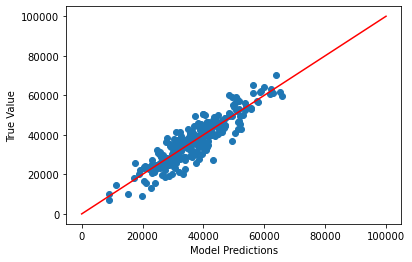

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(model.predict(X_test),y_test)
plt.xlabel('Model Predictions')
plt.ylabel('True Value')
plt.plot([0, 100000], [0, 100000], 'k-', color = 'r')
plt.show()

In [36]:
from scipy.stats.stats import pearsonr
# El valor de x, es el nivel de predicción.
pearsonr(model.predict(X_test),y_test)

(0.9061597827907564, 1.1552714895195607e-94)

In [37]:
#Pa' comprobar si es lo mismo que usar otra semilla (Random_state(n)) usamos una validación cruzada.